In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

we can drop penalty kicks, olimpico goals, and free kicks.

In [2]:
dataset = pd.read_csv("football.csv")

In [6]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8925 entries, 0 to 8924
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   matchId                8925 non-null   object 
 1   playerId               8925 non-null   object 
 2   playType               8925 non-null   object 
 3   bodyPart               8925 non-null   object 
 4   x                      8925 non-null   float64
 5   y                      8925 non-null   float64
 6   interveningOpponents   8925 non-null   int64  
 7   interveningTeammates   8925 non-null   int64  
 8   interferenceOnShooter  8891 non-null   object 
 9   minute                 8925 non-null   int64  
 10  second                 8925 non-null   int64  
 11  outcome                8891 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 836.8+ KB


In [5]:
dataset.describe()

,x,y,interveningOpponents,interveningTeammates,minute,second
count,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000,8925.000000
mean,14.564631,0.364408,2.531989,0.336471,48.541401,29.243810
std,7.841865,8.999063,1.386693,0.680175,26.397998,17.306565
min,0.000000,-33.920000,0.000000,0.000000,0.000000,0.000000
25%,8.480000,-5.740000,2.000000,0.000000,26.000000,14.000000
50%,12.470000,0.500000,2.000000,0.000000,49.000000,29.000000
75%,20.950000,6.730000,3.000000,0.000000,71.000000,44.000000
max,70.820000,33.920000,11.000000,7.000000,98.000000,59.000000


In [7]:
missing_values = dataset.isnull().sum()
missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100
missing_data_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': missing_percentage})
missing_data_df

,Missing Values,Percentage Missing
matchId,0,0.000000
playerId,0,0.000000
playType,0,0.000000
bodyPart,0,0.000000
x,0,0.000000
y,0,0.000000
interveningOpponents,0,0.000000
interveningTeammates,0,0.000000
interferenceOnShooter,34,0.380952
minute,0,0.000000


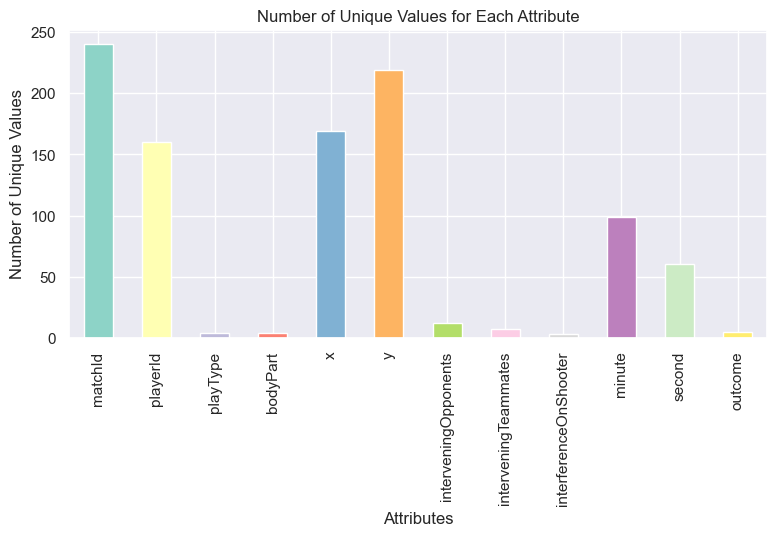

In [9]:
unique_counts = dataset.nunique()

sns.set_theme()
colors = sns.color_palette('Set3')
unique_counts.plot(kind='bar', figsize=(9, 4), color=colors)
plt.title('Number of Unique Values for Each Attribute')
plt.xlabel('Attributes')
plt.ylabel('Number of Unique Values')
plt.show()

In [17]:
print("interveningTeammates uniques:" ,dataset["interveningTeammates"].unique())
print("interveningOpponents uniques:" ,dataset["interveningOpponents"].unique())
print("bodyPart uniques:" ,dataset["bodyPart"].unique())
print("interferenceOnShooter uniques:" ,dataset["interferenceOnShooter"].unique())
print("playType uniques:" ,dataset["playType"].unique())
print("outcome uniques:" ,dataset["outcome"].unique())


interveningTeammates uniques: [0 2 1 3 4 5 7]
interveningOpponents uniques: [ 1  3  6  4  2  8  5  7  0  9 10 11]
bodyPart uniques: ['right foot' 'left foot' 'head' 'other']
interferenceOnShooter uniques: ['medium' 'low' 'high' nan]
playType uniques: ['open play' 'free kick' 'penalty' 'olimpico']
outcome uniques: ['goal' 'saved by keeper' 'missed chance' 'blocked shot' 'hit the post'
 nan]


In [18]:
print(dataset["outcome"].value_counts())

outcome
missed chance      3470
saved by keeper    2395
blocked shot       1771
goal               1081
hit the post        174
Name: count, dtype: int64


In [19]:
print(dataset["interferenceOnShooter"].value_counts())

interferenceOnShooter
medium    4186
low       3315
high      1390
Name: count, dtype: int64


In [20]:
print(dataset["bodyPart"].value_counts())

bodyPart
right foot    4454
left foot     2897
head          1515
other           59
Name: count, dtype: int64


In [21]:
print(dataset["interveningOpponents"].value_counts())

interveningOpponents
2     3150
3     2135
1     1885
4      879
5      399
6      217
7      119
0       97
8       38
9        3
10       2
11       1
Name: count, dtype: int64


In [25]:
print(dataset["x"].describe())
print("---------------------")
print(dataset["y"].describe())

count    8925.000000
mean       14.564631
std         7.841865
min         0.000000
25%         8.480000
50%        12.470000
75%        20.950000
max        70.820000
Name: x, dtype: float64
---------------------
count    8925.000000
mean        0.364408
std         8.999063
min       -33.920000
25%        -5.740000
50%         0.500000
75%         6.730000
max        33.920000
Name: y, dtype: float64


In [26]:
print(dataset[dataset["playType"] == "open play"].value_counts())

matchId  playerId  playType   bodyPart    x      y       interveningOpponents  interveningTeammates  interferenceOnShooter  minute  second  outcome        
m_1      p_102     open play  right foot  24.94  -7.23   3                     0                     low                    80      7       saved by keeper    1
m_26     p_24      open play  left foot   22.20  -9.23   3                     0                     medium                 33      5       blocked shot       1
         p_160     open play  right foot  20.95   6.98   3                     0                     low                    39      7       goal               1
         p_157     open play  head        8.73   -4.24   2                     0                     high                   58      4       missed chance      1
         p_155     open play  left foot   10.97  -5.49   2                     0                     high                   74      13      saved by keeper    1
                                       

In [27]:
dataset["goal"] = dataset["outcome"].apply(lambda x: 1 if x == 'goal' else 0).astype(bool)

In [66]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,True
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,False
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,False
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,False
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,True


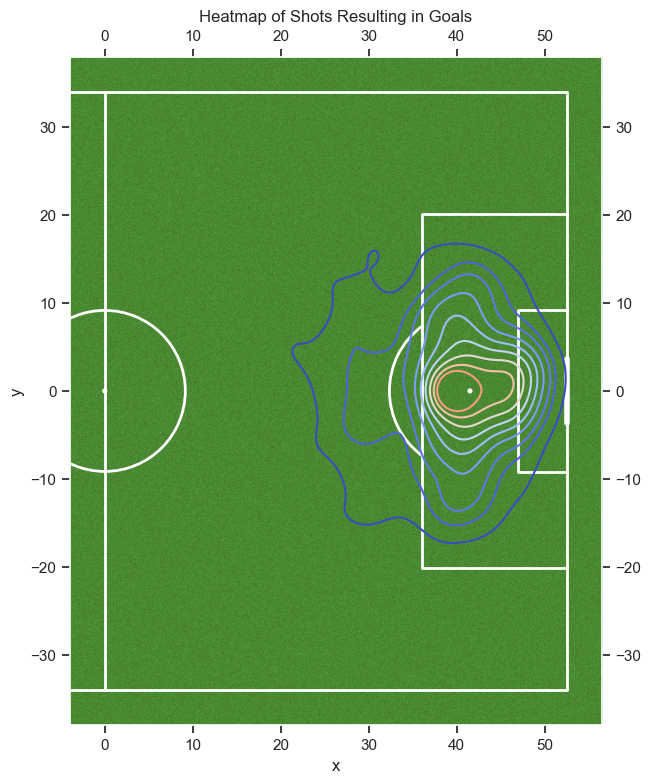

In [29]:
goal_shots = dataset[dataset['goal'] == True]

pitch = Pitch(pitch_type='skillcorner', pitch_color='grass', axis=True, label=True, tick=True, half=True, pitch_length=105, pitch_width=68)

fig, ax = pitch.draw(figsize=(12, 8))
heatmap = sns.kdeplot(x= 52.5 -2.44 - goal_shots['x'] , y= goal_shots['y'], cmap='coolwarm')

plt.title('Heatmap of Shots Resulting in Goals')
plt.show()

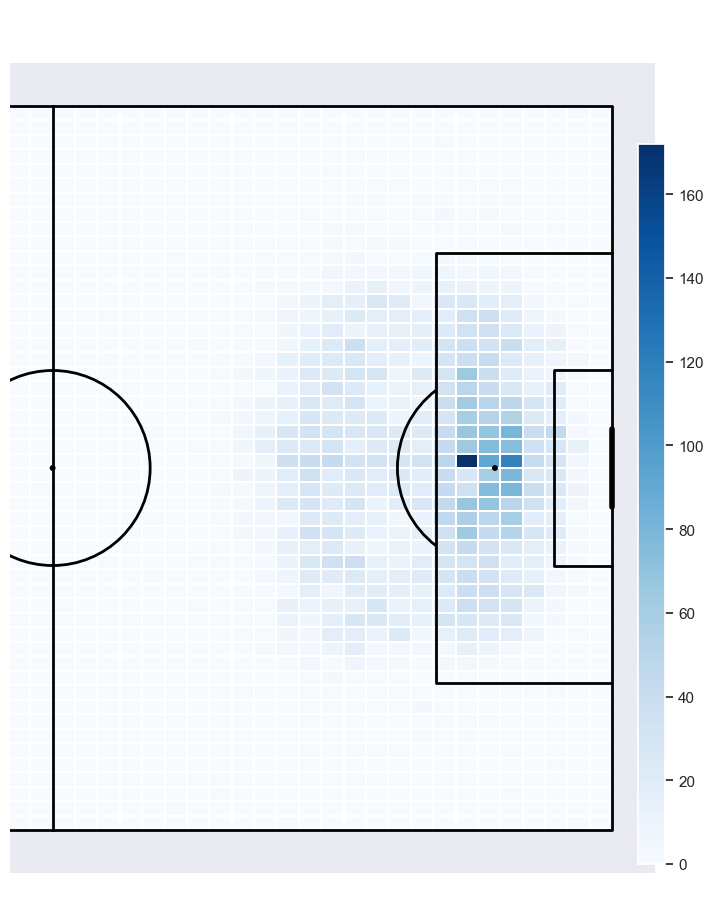

In [89]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)

bin_statistic_shots = pitch.bin_statistic(52.5 - 2.44 - dataset["x"], dataset["y"], bins=50)

pcm = pitch.heatmap(bin_statistic_shots, ax=ax["pitch"], cmap='Blues', edgecolor='white', linewidth = 0.01)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
plt.show()


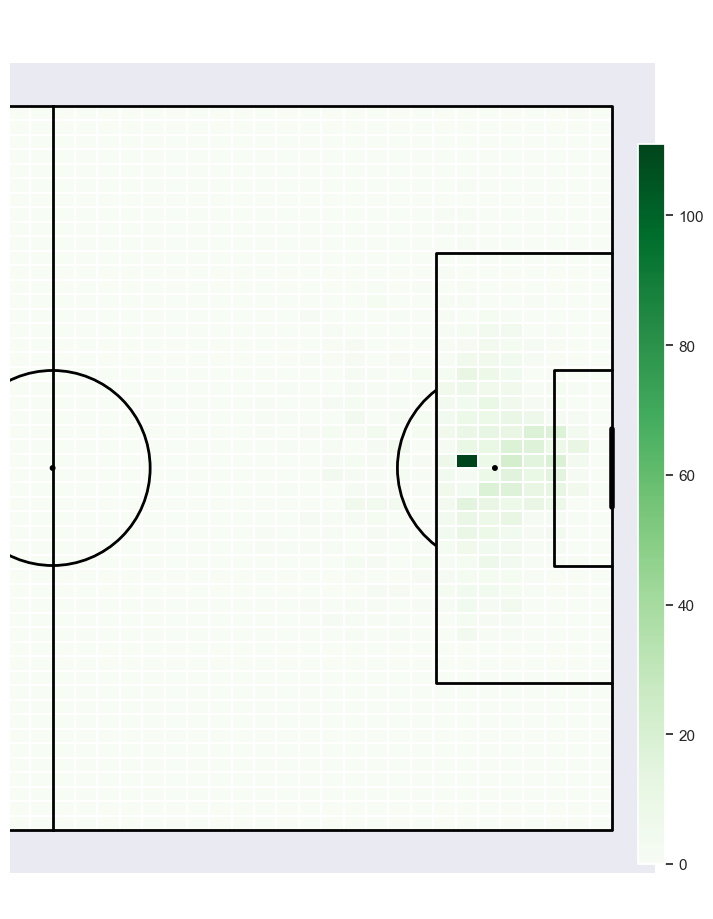

In [90]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
goal_shots = dataset[dataset["goal"] == True]
bin_statistic_goals = pitch.bin_statistic(52.5 - 2.44 - goal_shots["x"], goal_shots["y"], bins=50)

pcm = pitch.heatmap(bin_statistic_goals, ax=ax["pitch"], cmap='Greens', edgecolor='white', linewidth = 0.01)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
plt.show()


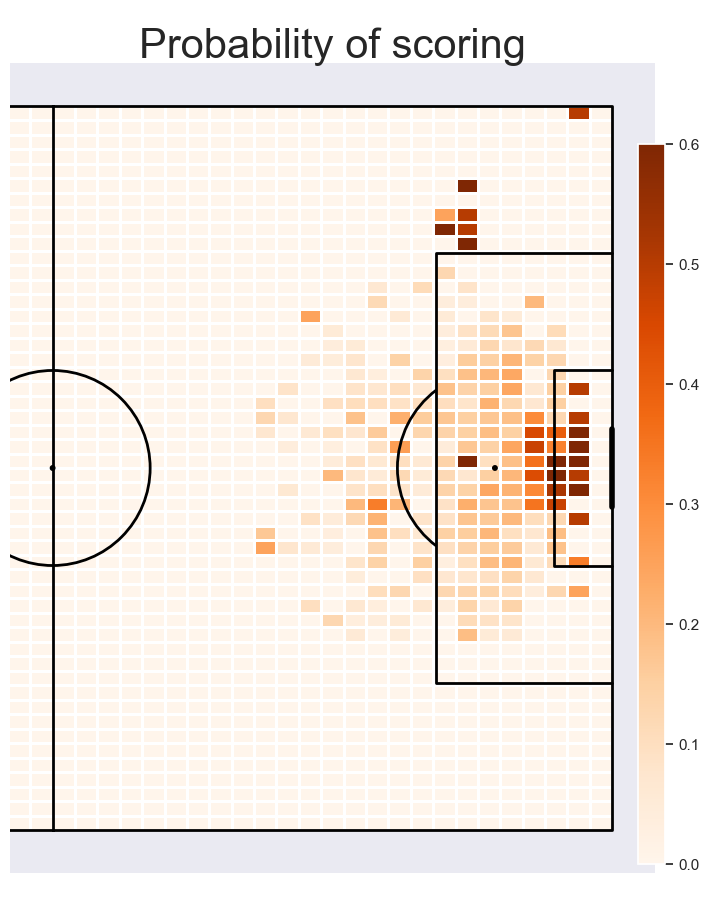

In [91]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)
bin_statistic = pitch.bin_statistic(52.5 - 2.44 - dataset["x"], dataset["y"], bins = 50)


for i in range(bin_statistic_goals["statistic"].shape[0]):
    for j in range(bin_statistic_goals["statistic"].shape[1]):
        if bin_statistic_shots["statistic"][i,j] != 0:
            bin_statistic["statistic"][i,j] = bin_statistic_goals["statistic"][i,j] / bin_statistic_shots["statistic"][i,j]
        else:
            bin_statistic["statistic"][i,j] = 0

pcm = pitch.heatmap(bin_statistic, ax=ax["pitch"], cmap='Oranges', edgecolor='white', vmin = 0, vmax = 0.6)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()

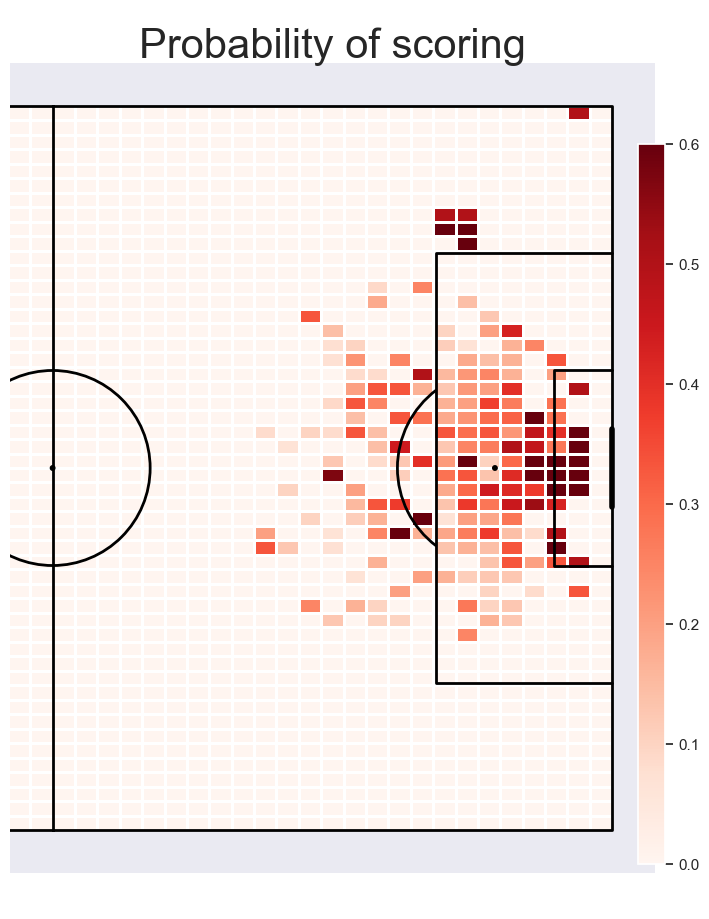

In [92]:
pitch = Pitch(line_color='black', half = True, pitch_type='skillcorner', pitch_length=105, pitch_width=68, line_zorder = 2)
fig, ax = pitch.grid(   grid_height=0.9, title_height=0.06, axis=False,
                        endnote_height=0.04, title_space=0, endnote_space=0)

low_interference = dataset[dataset["interferenceOnShooter"] == "low"]

bin_statistic_shots_low = pitch.bin_statistic(52.5 - 2.44 - low_interference["x"], low_interference["y"], bins = 50)

low_interference_goal = low_interference[(low_interference["goal"] == True)]
bin_statistic_goals_low = pitch.bin_statistic(52.5 - 2.44 - low_interference_goal["x"], low_interference_goal["y"], bins = 50)

bin_statistic_low = pitch.bin_statistic(52.5 - 2.44 - low_interference_goal["x"], low_interference_goal["y"], bins = 50)

for i in range(bin_statistic_shots_low["statistic"].shape[0]):
    for j in range(bin_statistic_shots_low["statistic"].shape[1]):
        if bin_statistic_shots_low["statistic"][i,j] != 0:
            bin_statistic_low["statistic"][i,j] = bin_statistic_goals_low["statistic"][i,j] / bin_statistic_shots_low["statistic"][i,j]
        else:
            bin_statistic_low["statistic"][i,j] = 0

pcm = pitch.heatmap(bin_statistic_low, ax=ax["pitch"], cmap='Reds', edgecolor='white', vmin = 0, vmax = 0.6)

ax_cbar = fig.add_axes((0.95, 0.05, 0.04, 0.8))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Probability of scoring' , fontsize = 30)
plt.show()


In [98]:
dataset["angle"] =  np.degrees( np.where(   np.arctan(7.32 * dataset["x"] / (dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)) > 0,
                                np.arctan(7.32 * dataset["x"] /(dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)),
                                np.arctan(7.32 * dataset["x"] /(dataset["x"]**2 + dataset["y"]**2 - (7.32/2)**2)) + np.pi))
print(dataset[dataset["angle"] < 90].value_counts().sum())

8797


In [96]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal,angle
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,True,18.544088
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,False,13.982592
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,False,14.153255
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,False,15.458384
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,True,31.315918


In [99]:
def calculate_distance(x_values, y_values):
    distances = np.sqrt(np.power(x_values, 2) + np.power(y_values, 2))
    return distances

dataset["distance"] = calculate_distance(dataset["x"].to_numpy(), dataset["y"].to_numpy())

In [100]:
dataset.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,goal,angle,distance
0,m_91,p_103,open play,right foot,13.47,-11.22,1,0,medium,70,9,goal,True,18.544088,17.530810
1,m_17,p_16,open play,left foot,9.48,14.22,3,0,medium,55,4,saved by keeper,False,13.982592,17.090313
2,m_111,p_88,free kick,left foot,29.43,-1.25,6,2,low,86,31,saved by keeper,False,14.153255,29.456534
3,m_142,p_87,open play,right foot,26.93,1.00,4,1,medium,77,2,missed chance,False,15.458384,26.948560
4,m_117,p_9,open play,right foot,10.72,5.24,2,0,medium,76,46,goal,True,31.315918,11.932141


In [101]:
print(dataset[(dataset["interferenceOnShooter"] == "high") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print(dataset[(dataset["interferenceOnShooter"] == "low") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print(dataset[(dataset["interferenceOnShooter"] == "medium") & (dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print("#############################################")
print("goals scored from penalties : ")
print(dataset[(dataset["playType"] == "penalty") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from open plays : ")
print(dataset[(dataset["playType"] == "open play") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from free kicks : ")
print(dataset[(dataset["playType"] == "free kick") & (dataset["goal"] == True)].value_counts().sum())
print("goals scored from corner kicks : ")
print(dataset[(dataset["playType"] == "olimpico") & (dataset["goal"] == True)].value_counts().sum())
print("#############################################")
print("goals scored from inside the box : ")
print(dataset[(dataset["goal"] == True) & (dataset["distance"] <= 18)].value_counts().sum())
print(dataset[(dataset["playType"] == "olimpico") & (dataset["goal"] == True)])
print(dataset[(dataset["interferenceOnShooter"] == "low")].value_counts().sum())

89
413
447
#############################################
goals scored from penalties : 
97
goals scored from open plays : 
949
goals scored from free kicks : 
33
goals scored from corner kicks : 
2
#############################################
goals scored from inside the box : 
922
     matchId playerId  playType    bodyPart     x      y  \
2160   m_131     p_20  olimpico  right foot  0.25  33.92   
5357   m_100     p_65  olimpico        head  7.98   1.25   

      interveningOpponents  interveningTeammates interferenceOnShooter  \
2160                     4                     2                   low   
5357                     4                     0                  high   

      minute  second outcome  goal      angle   distance  
2160      33      22    goal  True   0.092198  33.920921  
5357      27      28    goal  True  48.408075   8.077308  
3315


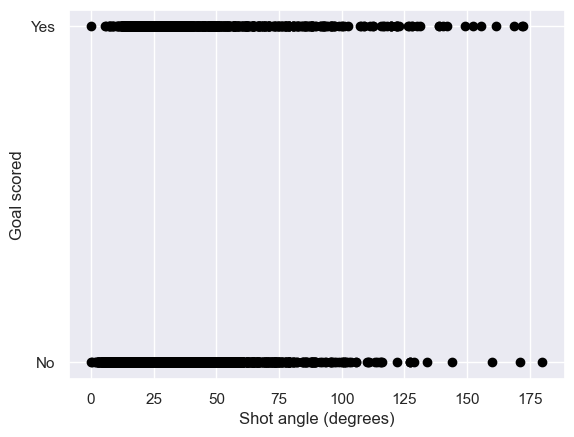

In [102]:
fig, ax = plt.subplots()
ax.plot(dataset['angle'], dataset['goal'], linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
ax.set_yticks([0,1])
ax.set_yticklabels(['No','Yes'])
plt.show()

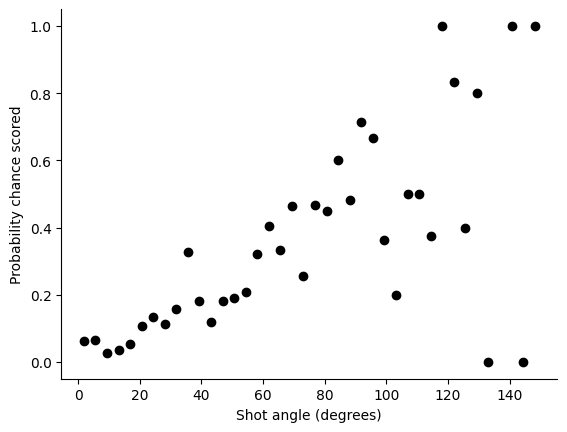

In [15]:
shotcount_dist = np.histogram(dataset["angle"], bins=40, range=[0, 150])

goal_shots = dataset[dataset['goal'] == True]
goalcount_dist = np.histogram(goal_shots["angle"], bins=40, range=[0, 150])
np.seterr(divide='ignore', invalid='ignore')

prob_goal = np.divide(goalcount_dist[0], shotcount_dist[0])
angle = shotcount_dist[1]
midangle = (angle[:-1] + angle[1:])/2

fig,ax = plt.subplots()
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Shot angle (degrees)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


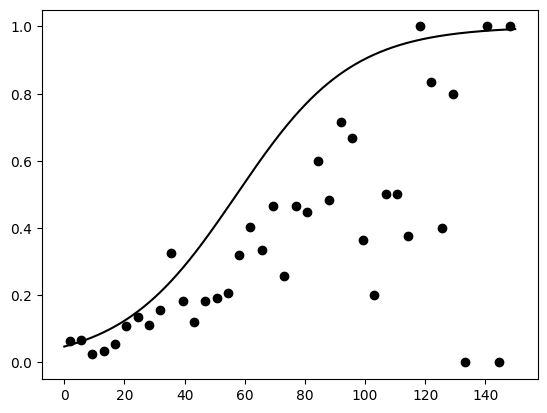

In [16]:
fig, ax = plt.subplots()
b = [3, -3]
x = np.arange(150,step=0.1)
y = 1/(1+np.exp(b[0]+b[1]*x*np.pi/180))
ax.plot(midangle, prob_goal, linestyle='none', marker= '.', markersize= 12, color='black')
ax.plot(x, y, linestyle='solid', color='black')
plt.show()

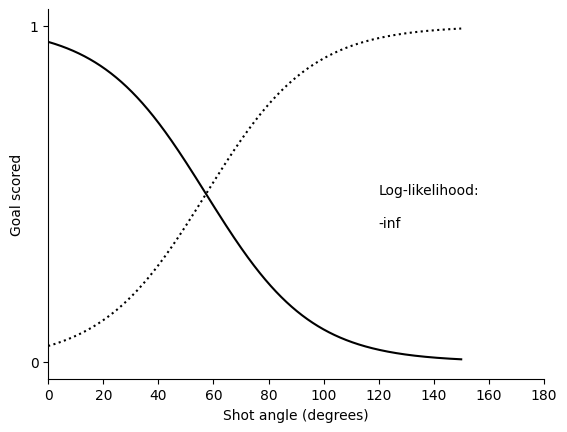

In [17]:
xG = 1/(1+np.exp(b[0]+b[1]*dataset['angle']))
dataset = dataset.assign(xG = xG)
shots_40 = dataset.iloc[:40]
fig, ax = plt.subplots()
ax.plot(shots_40['angle']*180/np.pi, shots_40['goal'], linestyle='none', marker= '.', markersize= 12, color='black', zorder = 3)
ax.plot(x, y, linestyle=':', color='black', zorder = 2)
ax.plot(x, 1-y, linestyle='solid', color='black', zorder = 2)
loglikelihood=0
for item,shot in shots_40.iterrows():
    ang = shot['angle'] * 180/np.pi
    if shot['goal'] == 1:
        loglikelihood = loglikelihood + np.log(shot['xG'])
        ax.plot([ang,ang],[shot['goal'],1-shot['xG']], color='red', zorder = 1)
    else:
        loglikelihood = loglikelihood + np.log(1 - shot['xG'])
        ax.plot([ang,ang], [shot['goal'], 1-shot['xG']], color='blue', zorder = 1)
ax.set_ylabel('Goal scored')
ax.set_xlabel("Shot angle (degrees)")
plt.ylim((-0.05,1.05))
plt.xlim((0,180))
plt.text(120,0.5,'Log-likelihood:')
plt.text(120,0.4,str(loglikelihood)[:6])
ax.set_yticks([0,1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['goal[False]', 'goal[True]']   No. Observations:                 8925
Model:                                       GLM   Df Residuals:                     8923
Model Family:                           Binomial   Df Model:                            1
Link Function:                             Logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -2949.5
Date:                           Fri, 10 May 2024   Deviance:                       5899.0
Time:                                   18:42:39   Pearson chi2:                 1.16e+04
No. Iterations:                                6   Pseudo R-squ. (CS):            0.07444
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

C:\Users\USER\AppData\Local\Temp\ipykernel_2196\544879390.py:4: RuntimeWarning: invalid value encountered in divide
  prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
C:\Users\USER\AppData\Local\Temp\ipykernel_2196\544879390.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xGprob=1/(1+np.exp(b[0]+b[1]*middistance))


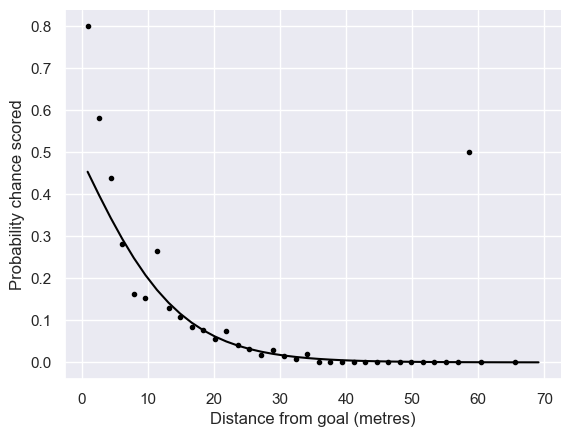

In [103]:
shotcount_dist = np.histogram(dataset['distance'],bins=40,range=[0, 70])
goal_shots = dataset[dataset['goal'] == True]
goalcount_dist = np.histogram(goal_shots['distance'],bins=40,range=[0, 70])
prob_goal = np.divide(goalcount_dist[0],shotcount_dist[0])
distance = shotcount_dist[1]
middistance= (distance[:-1] + distance[1:])/2
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


test_model = smf.glm(formula="goal ~ distance" , data=dataset,
                            family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance))
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()

                       Generalized Linear Model Regression Results                       
Dep. Variable:     ['goal[False]', 'goal[True]']   No. Observations:                 8925
Model:                                       GLM   Df Residuals:                     8922
Model Family:                           Binomial   Df Model:                            2
Link Function:                             Logit   Scale:                          1.0000
Method:                                     IRLS   Log-Likelihood:                -2944.6
Date:                           Fri, 10 May 2024   Deviance:                       5889.1
Time:                                   18:42:52   Pearson chi2:                 8.81e+03
No. Iterations:                                7   Pseudo R-squ. (CS):            0.07546
Covariance Type:                       nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------

C:\Users\USER\AppData\Local\Temp\ipykernel_2196\2135466068.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))


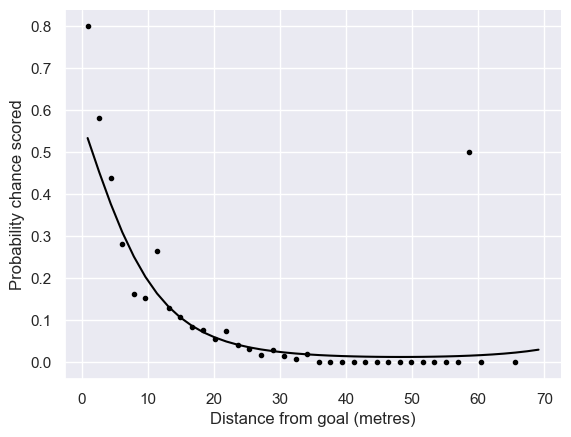

In [104]:
dataset["d2"] = dataset['distance']**2
test_model = smf.glm(   formula="goal ~ distance + d2" , data=dataset,
                            family=sm.families.Binomial()).fit()
print(test_model.summary())
b=test_model.params
xGprob=1/(1+np.exp(b[0]+b[1]*middistance+b[2]*pow(middistance,2)))
fig, ax = plt.subplots()
ax.plot(middistance, prob_goal, linestyle='none', marker= '.', color='black')
ax.set_ylabel('Probability chance scored')
ax.set_xlabel("Distance from goal (metres)")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.plot(middistance, xGprob, linestyle='solid', color='black')
plt.show()
